In [63]:
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets,metrics
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier

## Load dan Visualisassi dataset MNIST
Download dataset MNIST dari fungsi datasets
Sebelum klasifikasi dimulai, data perlu diratakan pada array dua dimensi untuk mengubah data menjadi vektor fitur.

In [64]:
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))/255.0
train_img=data[:int(n_samples // 5)]
train_lbl=digits.target[:int(n_samples // 5)]
test_img=data[int(n_samples // 2):]
test_lbl=digits.target[int(n_samples // 2):]

In [65]:
print (train_img.shape)
print (test_img.shape)
print (train_lbl.shape)
print (test_lbl.shape)

(359, 64)
(899, 64)
(359,)
(899,)


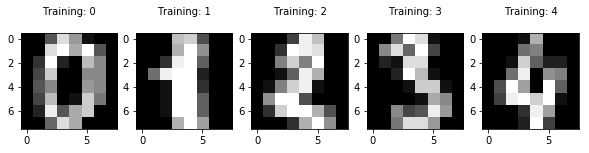

In [66]:
plt.figure(figsize=(10,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 10)

### Klasifikasi menggunakan SVM

In [67]:
clf = OneVsRestClassifier(SVC(probability=False,  # cache_size=200,
          kernel="rbf", C=2, gamma=.01),n_jobs=-1)

In [68]:
clf.fit(train_img, train_lbl)

OneVsRestClassifier(estimator=SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=-1)

## Performa Sistem
Performa sistem divisualisasikan menggunakan confusion matrix. 
Ada tiga score yang diperlihatkan, yaitu precision, recall, dan f1-score.
Nilai precision menunjukkan akurasi model dalam mengklasifikasi data yang ada di kelas diuji, sedangkan nilai recall menunjukkan akurasi mode dalam mengklasifikasi data yang bukan dari kelas yang diuji.
Nilai f1-score menunjukkan akurasi model secara keseluruhan.

In [69]:
predictions = clf.predict(test_img)
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(test_lbl, predictions)))
print("Confusion matrix:\n%s" %metrics.confusion_matrix(test_lbl,predictions))
print("Accuracy: %0.4f" % metrics.accuracy_score(test_lbl,predictions))

Classification report for classifier OneVsRestClassifier(estimator=SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=-1):
             precision    recall  f1-score   support

          0       0.73      1.00      0.85        88
          1       0.75      0.36      0.49        91
          2       0.88      0.78      0.83        86
          3       0.78      0.93      0.85        91
          4       0.79      0.89      0.84        92
          5       0.80      0.88      0.84        91
          6       0.83      0.99      0.90        91
          7       0.91      0.99      0.95        89
          8       0.85      0.65      0.74        88
          9       0.78      0.63      0.70        92

avg / total       0.81      0.81      0.80       899


Confusion matrix:
[[88  0  0  0  0  0  0  0  0  0

#### Menampilkan hasil prediksi

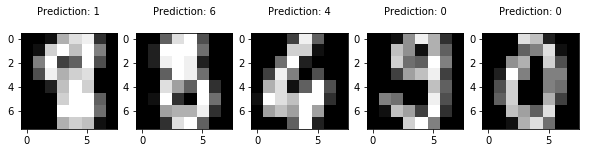

In [8]:
plt.figure(figsize=(10,4))
for index, (image, label) in enumerate(zip(test_img[0:5], predictions[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Prediction: %i\n' % label, fontsize = 10)

#### Visualisasi kesalahan dalam prediksi

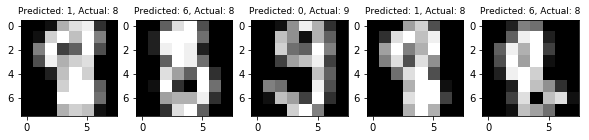

In [9]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1


plt.figure(figsize=(10,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (8,8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 9)